In [1]:
import pandas as pd
import seaborn as sns
import numpy
from ga.numba_ga import GaHMM
from slimane_1995.methods import do_ga_and_bw_return_gabw
from slimane_1995.observations import OBSERVATION_SEQUENCES, N_SYMBOLS_FOR_OBSERVATION_SEQUENCE

df = pd.read_csv('slimane_1995/dataframe2.csv')
df[df['method'] == 'bw_only']

df = df.drop(columns='Unnamed: 0')
df = df[df['time'] < 5] #Es wird je eine column in ga_only und ga_and_bw gedroppt
# es werden insgesamt 5 einträge entfernt

<AxesSubplot: xlabel='method', ylabel='log_prob'>

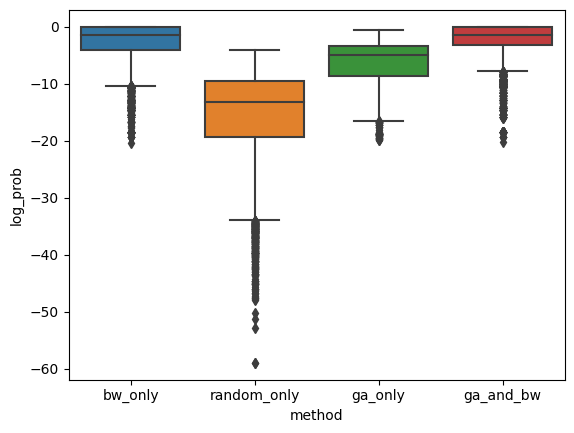

In [2]:
# Mean log probability
# mean_log_probs = df.groupby('method').agg({'log_prob': ['mean', 'min', 'max']})

# mean_log_probs_df = pd.DataFrame(mean_log_probs).reset_index()
sns.boxplot(df, x='method', y='log_prob')
# mean_log_probs

<AxesSubplot: xlabel='method', ylabel='log_prob'>

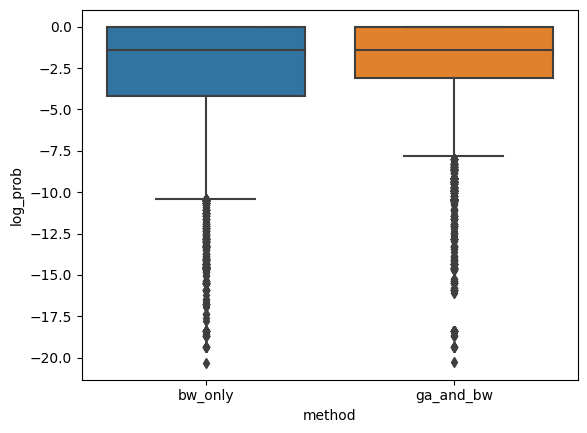

In [3]:
df_ga_vs_bw = df[df['method'].isin(['ga_and_bw', 'bw_only'])]
sns.boxplot(df_ga_vs_bw, x='method', y='log_prob')

mean_bw_only:0.0020597915269041814
mean_ga_and_bw:0.9972444963368354
difference: 484.1482661285002


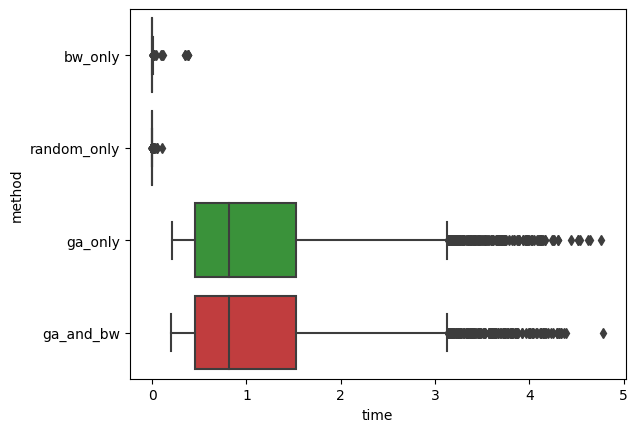

In [5]:
# Time Evaluation

sns.boxplot(df, y='method', x='time')

mean_time = df.groupby('method')['time'].mean()
mean_bw = mean_time['bw_only']
mean_ga_and_bw = mean_time['ga_and_bw']
difference = mean_time['ga_and_bw'] / mean_time['bw_only']
print(f'mean_bw_only:{mean_bw}')
print(f'mean_ga_and_bw:{mean_ga_and_bw}')
print(f'difference: {difference}')

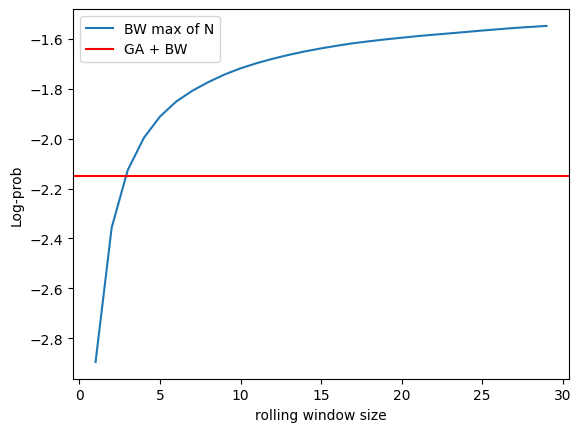

In [61]:
rolling_comparison_data = []

for rolling_size in range(1,30):
    method_name = f'bw_rolling_{rolling_size}'
    rolling_window = df[df['method'] == 'bw_only'].groupby(['observation_sequence', 'n_states'])['log_prob'].rolling(rolling_size)
    log_prob = rolling_window.max().mean()
    rolling_comparison_data.append({
        'log_prob': log_prob,
        'rolling_window_size': rolling_size
    })

rolling_df = pd.DataFrame(rolling_comparison_data)
graph = sns.lineplot(rolling_df, x='rolling_window_size', y='log_prob', label='BW max of N')
graph.set(xlabel='rolling window size', ylabel='Log-prob')
mean_log_probs = df.groupby('method')['log_prob'].mean()
graph.axhline(mean_log_probs['ga_and_bw'], label='GA + BW', color='red')
graph.legend()

c:\Users\imigs\Desktop\GA HMM\ga\representation.py:97: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "calc_chromosome_ranges" failed type inference due to: Invalid use of type(CPUDispatcher(<function calc_starts_and_stops at 0x0000024728F62DD0>)) with parameters (int64, int64)

During: resolving callee type: type(CPUDispatcher(<function calc_starts_and_stops at 0x0000024728F62DD0>))
During: typing of call at c:\Users\imigs\Desktop\GA HMM\ga\representation.py (102)


File "ga\representation.py", line 102:
def calc_chromosome_ranges(n_states: int, n_symbols: int) -> ChromosomeRanges:
    <source elided>
    
    starts, stops = calc_starts_and_stops(n_states, n_symbols)
    ^

  @jit
c:\Users\imigs\Desktop\GA HMM\venv\lib\site-packages\numba\core\object_mode_passes.py:151: NumbaWarning: Function "calc_chromosome_ranges" was compiled in object mode without forceobj=True.

File "ga\representation.py", line 98:
@jit
def calc_chromosome_r

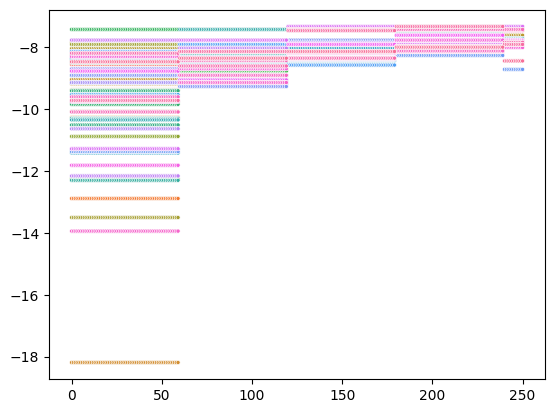

In [2]:
# I need a moped of that schmoped
obs_sequence_index = 3
obs_sequence = OBSERVATION_SEQUENCES[obs_sequence_index]
n_symbols = N_SYMBOLS_FOR_OBSERVATION_SEQUENCE[obs_sequence_index]
n_states = 4
gabw = do_ga_and_bw_return_gabw(n_states, n_symbols, obs_sequence)
gabw.logs.plot()

<AxesSubplot: >

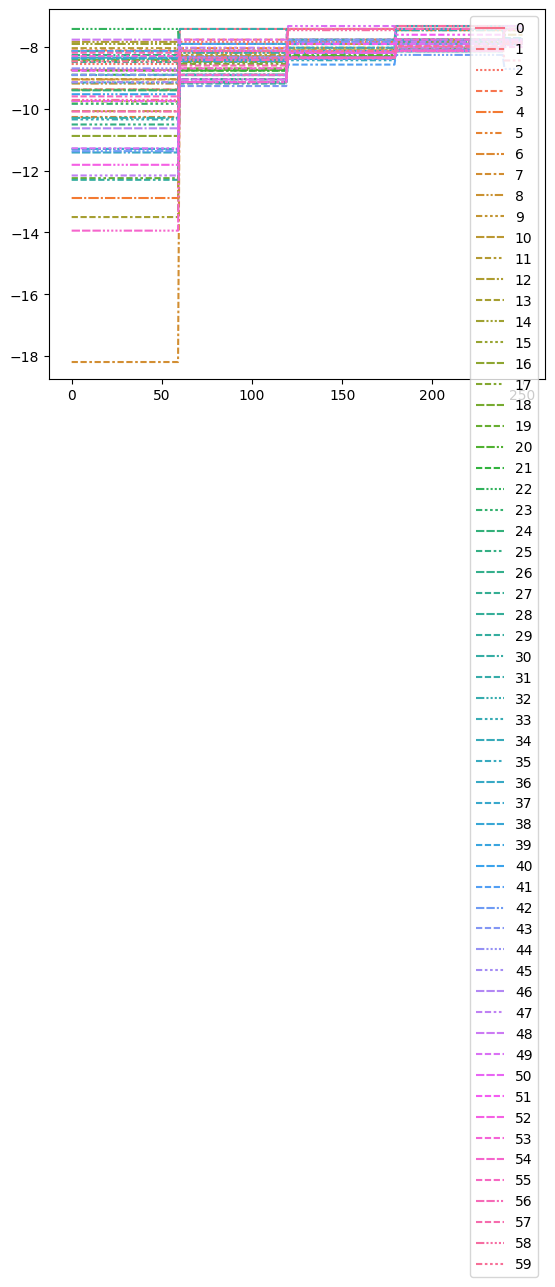

In [5]:
sns.lineplot(gabw.logs.logs.T)


In [ ]:
mean_time = df.groupby('method')['time'].mean()

In [59]:

df_schme_f = df[df['method'].isin(['ga_and_bw', 'bw_only'])].groupby(['n_states', 'observation_sequence', 'method']).max()

boi = df_schme_f.reset_index()

# boi[boi['observation_sequence'] == 0]
A = df[df['method'] == 'bw_only'].groupby(['n_states', 'observation_sequence'])['log_prob'].max()
B = df[df['method'] == 'ga_and_bw'].groupby(['n_states', 'observation_sequence'])['log_prob'].max()
M = B > A

# pd.DataFrame(M).reset_index()


C:\Users\imigs\AppData\Local\Temp\ipykernel_18716\3029249578.py:17: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['method'], dtype='object')
  df.rolling(2).max()


,observation_sequence,n_states,time,log_prob
0,NaN,NaN,NaN,NaN
1,0.0,2.0,7.260414,-8.570438
2,0.0,2.0,7.260414,-8.570438
3,0.0,2.0,0.228229,-8.556582
4,0.0,2.0,0.228229,-8.556582
...,...,...,...,...
37995,9.0,20.0,1.946087,-13.922970
37996,9.0,20.0,1.946087,0.000000
37997,9.0,20.0,1.909138,0.000000
37998,9.0,20.0,1.909138,-0.004578


In [34]:
# Wie oft ist der Genetische Algorithmus besser als alle 
df.head()

,method,observation_sequence,n_states,time,log_prob
0,bw_only,0,2,0.380849,-8.570438
1,ga_and_bw,0,2,7.260414,-8.570438
2,random_only,0,2,0.025930,-15.968785
3,ga_only,0,2,0.228229,-8.556582
4,bw_only,0,2,0.000304,-8.570438


In [ ]:
# Do eine iteration over time und plotte den graph

# War der ga and bw in der Lage jemals eine bessere Lösung als der Baum-welch algorithmus zu finden?